# Log Loss (Logaritmik Kayıp) Nedir?
Log Loss, sınıflandırma problemlerinde modelin tahmin ettiği olasılıkların gerçek sınıf etiketleri ile ne kadar uyuştuğunu ölçen bir hata metriğidir.

**Özellikleri:**
- Değer aralığı: $[0, \infty)$
- Düşük değerler daha iyi sonuç anlamına gelir
- Mükemmel tahminlerde: **Log Loss = 0**

## Log Loss Formülü
Binary sınıflandırma için log loss formülü şu şekildedir:

$$
\text{LogLoss} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(p_i) + (1 - y_i) \log(1 - p_i)\right]
$$

Burada:
- $N$: örnek sayısı
- $y_i$: gerçek etiket (0 veya 1)
- $p_i$: modelin 1 sınıfı için tahmin ettiği olasılık

In [1]:
from sklearn.metrics import log_loss
import numpy as np

# Gerçek etiketler (ground truth)
y_true = [1, 0, 1, 1, 0]

# Modelin tahmin ettiği olasılıklar
y_pred_proba = [0.9, 0.1, 0.8, 0.65, 0.3]

# Log Loss hesaplama
loss = log_loss(y_true, y_pred_proba)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.2443


Yorum: Log Loss değerinin bu denli düşük çıkması geliştirdiğimiz modelin tahminlerinin iyi olduğunu gösterir.


## Model Tahmin Güvenine Göre Log Loss
Modelin tahminlerinden ne kadar emin olduğu log loss değerini etkiler. Aşağıdaki örnekte üç farklı modelin tahminlerine göre log loss değişimini göreceğiz.

In [2]:
y_true = [1, 0, 1, 1, 0]

model_1 = [0.9, 0.1, 0.8, 0.65, 0.3]  # iyi model
model_2 = [0.6, 0.4, 0.55, 0.6, 0.45]  # kararsız model
model_3 = [0.1, 0.9, 0.2, 0.4, 0.8]   # kötü model (yanlış güvenli tahminler)

print("Model 1 Log Loss:", log_loss(y_true, model_1))
print("Model 2 Log Loss:", log_loss(y_true, model_2))
print("Model 3 Log Loss:", log_loss(y_true, model_3))

Model 1 Log Loss: 0.24426448853220978
Model 2 Log Loss: 0.5456301745618426
Model 3 Log Loss: 1.7480673485460898


Yorum: Model 1'in etiketlerle en uyumlu model olduğunu görüyoruz çünkü en düşük Log Loss değerine sahip.Model 3 is en yüksek Log Loss değerine sahip yani yanlış sınıfa yüksek güvenle tahminlerde bulunmuş.

## Görselleştirme: Log Loss Eğrisi

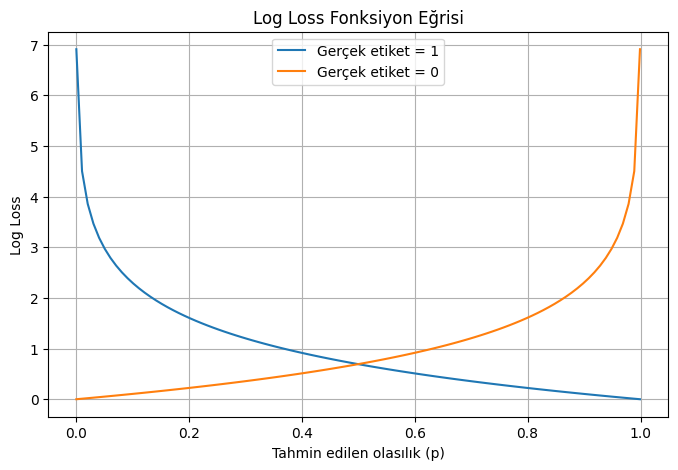

In [3]:
import matplotlib.pyplot as plt

p = np.linspace(0.001, 0.999, 100)
y1 = -np.log(p)            # y = 1 için log loss
y0 = -np.log(1 - p)        # y = 0 için log loss

plt.figure(figsize=(8, 5))
plt.plot(p, y1, label="Gerçek etiket = 1")
plt.plot(p, y0, label="Gerçek etiket = 0")
plt.xlabel("Tahmin edilen olasılık (p)")
plt.ylabel("Log Loss")
plt.title("Log Loss Fonksiyon Eğrisi")
plt.legend()
plt.grid(True)
plt.show()

Mavi eğri: Gerçek etiket 1 olduğunda, tahmin edilen olasılık 1'e yaklaştıkça log loss azalır. Ancak tahmin 0’a yaklaştığında log loss keskin bir şekilde artar.

Turuncu eğri: Gerçek etiket 0 olduğunda, tahmin edilen olasılık 0’a yaklaştıkça log loss azalır. Ama 1’e yaklaştığında log loss patlar.




Log Loss, sadece doğru tahmin yapmayı değil, tahminin ne kadar güvenle yapıldığını da dikkate alır.
Yanlış sınıfa yüksek olasılık vermek, cezayı aşırı artırır.
Bu yüzden modeller, sadece doğru tahmin değil, doğruya yakın güvenle tahmin yapmak zorundadır.